In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import archnemesis as ans
from archnemesis.database.datatypes.wave_range import WaveRange


# Define files used later

test_data_dir = Path("./test_data")
original_source_file = test_data_dir / "hitran24.h5"
combined_external_source_file = original_source_file.with_stem(original_source_file.stem + '_with_external_sources')

In [2]:
# Constants that define the data source and isotopologue we are using 

ANS_LINE_DATABASE_FILE = combined_external_source_file
ANS_PARTITION_FUNCTION_DATABASE_FILE = combined_external_source_file

gasID, isoID, ambient_gas = (
    ans.enums.Gas.CH4, 
    0,
    ans.enums.AmbientGas.AIR,
)
vmin, vmax = WaveRange(1.3, 3.5, ans.enums.WaveUnit.Wavelength_um).as_unit(ans.enums.WaveUnit.Wavenumber_cm).values()

print(f'{gasID=} {isoID=}')
print(f'{vmin=} {vmax=}')

gasID=<Gas.CH4: 6> isoID=0
vmin=2857.1428571428573 vmax=7692.3076923076915


In [3]:
# Create a LineData_0 instance and load the data we need

line_data = ans.LineData_0(
	ID=gasID,
	ISO=isoID,
	ambient_gas=ambient_gas,
	LINE_DATABASE = ANS_LINE_DATABASE_FILE,
	PARTITION_FUNCTION_DATABASE = ANS_PARTITION_FUNCTION_DATABASE_FILE,
)

# Loading the line data in our required spectral range
line_data.fetch_linedata(vmin=vmin,vmax=vmax)

# Loading the partition function data
line_data.fetch_partition_function()

INFO :: fetch_partition_function :: LineData_0.py-482 :: Retrieved partition function data from database test_data/hitran24_with_external_sources.h5


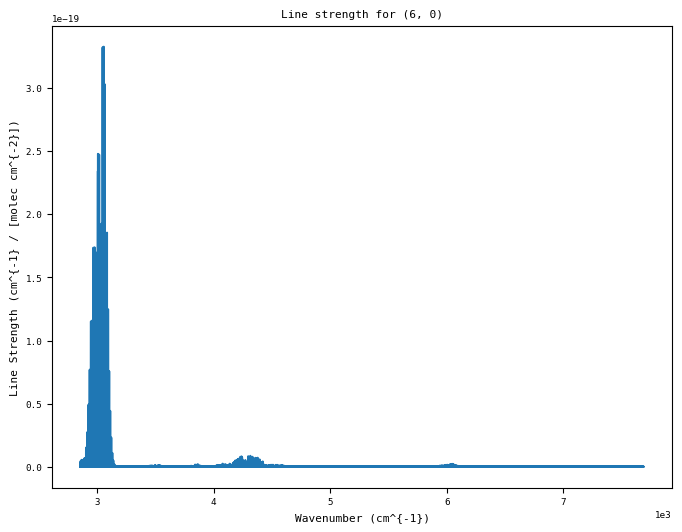

In [4]:
# Calculate line strengths and plot them #

line_strengths = line_data.calculate_line_strength(T=200)

plt.plot(line_data.line_data.NU, line_strengths)
plt.title(f'Line strength for ({line_data.ID}, {line_data.ISO})')
plt.xlabel('Wavenumber (cm^{-1})')
plt.ylabel('Line Strength (cm^{-1} / [molec cm^{-2}])')
plt.show()

INFO :: calculate_monochromatic_absorption :: LineData_0.py-712 :: Computing line contributions.  STARTING at 2026-02-19T14:52:31.401416
INFO :: calculate_monochromatic_absorption :: LineData_0.py-719 :: Computing line contributions.  Progress: 1000 / 51164 [  1.95 %] Time: Elapsed 00:00:00.054 Est. Remaining 00:00:02.708 Est. Completion 2026-02-19T14:52:34.163200
INFO :: calculate_monochromatic_absorption :: LineData_0.py-712 :: Computing line contributions.  FINISHED at 2026-02-19T14:52:34.193187


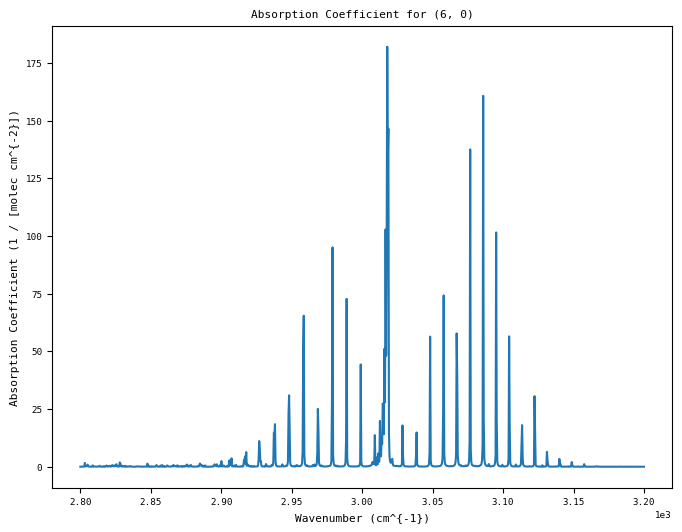

In [5]:
# Define a set of wavelengts to calculate absorption coefficient at and then plot them #

waves = np.linspace(2800, 3200, 1000)
k_abs = line_data.calculate_monochromatic_absorption(waves, 200, 1)

plt.plot(waves, k_abs)
plt.title(f'Absorption Coefficient for ({line_data.ID}, {line_data.ISO})')
plt.xlabel('Wavenumber (cm^{-1})')
plt.ylabel('Absorption Coefficient (1 / [molec cm^{-2}])')
plt.show()

INFO :: plot_linedata :: LineData_0.py-929 :: gas_desc=RadtranGasDescriptor(gas_id=<Gas.CH4: 6>, iso_id=1) gas_linedata.shape=(170422,)
INFO :: plot_linedata :: LineData_0.py-929 :: gas_desc=RadtranGasDescriptor(gas_id=<Gas.CH4: 6>, iso_id=2) gas_linedata.shape=(32541,)
INFO :: plot_linedata :: LineData_0.py-929 :: gas_desc=RadtranGasDescriptor(gas_id=<Gas.CH4: 6>, iso_id=3) gas_linedata.shape=(38579,)
INFO :: plot_linedata :: LineData_0.py-929 :: gas_desc=RadtranGasDescriptor(gas_id=<Gas.CH4: 6>, iso_id=4) gas_linedata.shape=(0,)
/home/dobinsonl/repos/archnemesis-dist/archnemesis/LineData_0.py:1018: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(smin, line_strengths_max * 10)


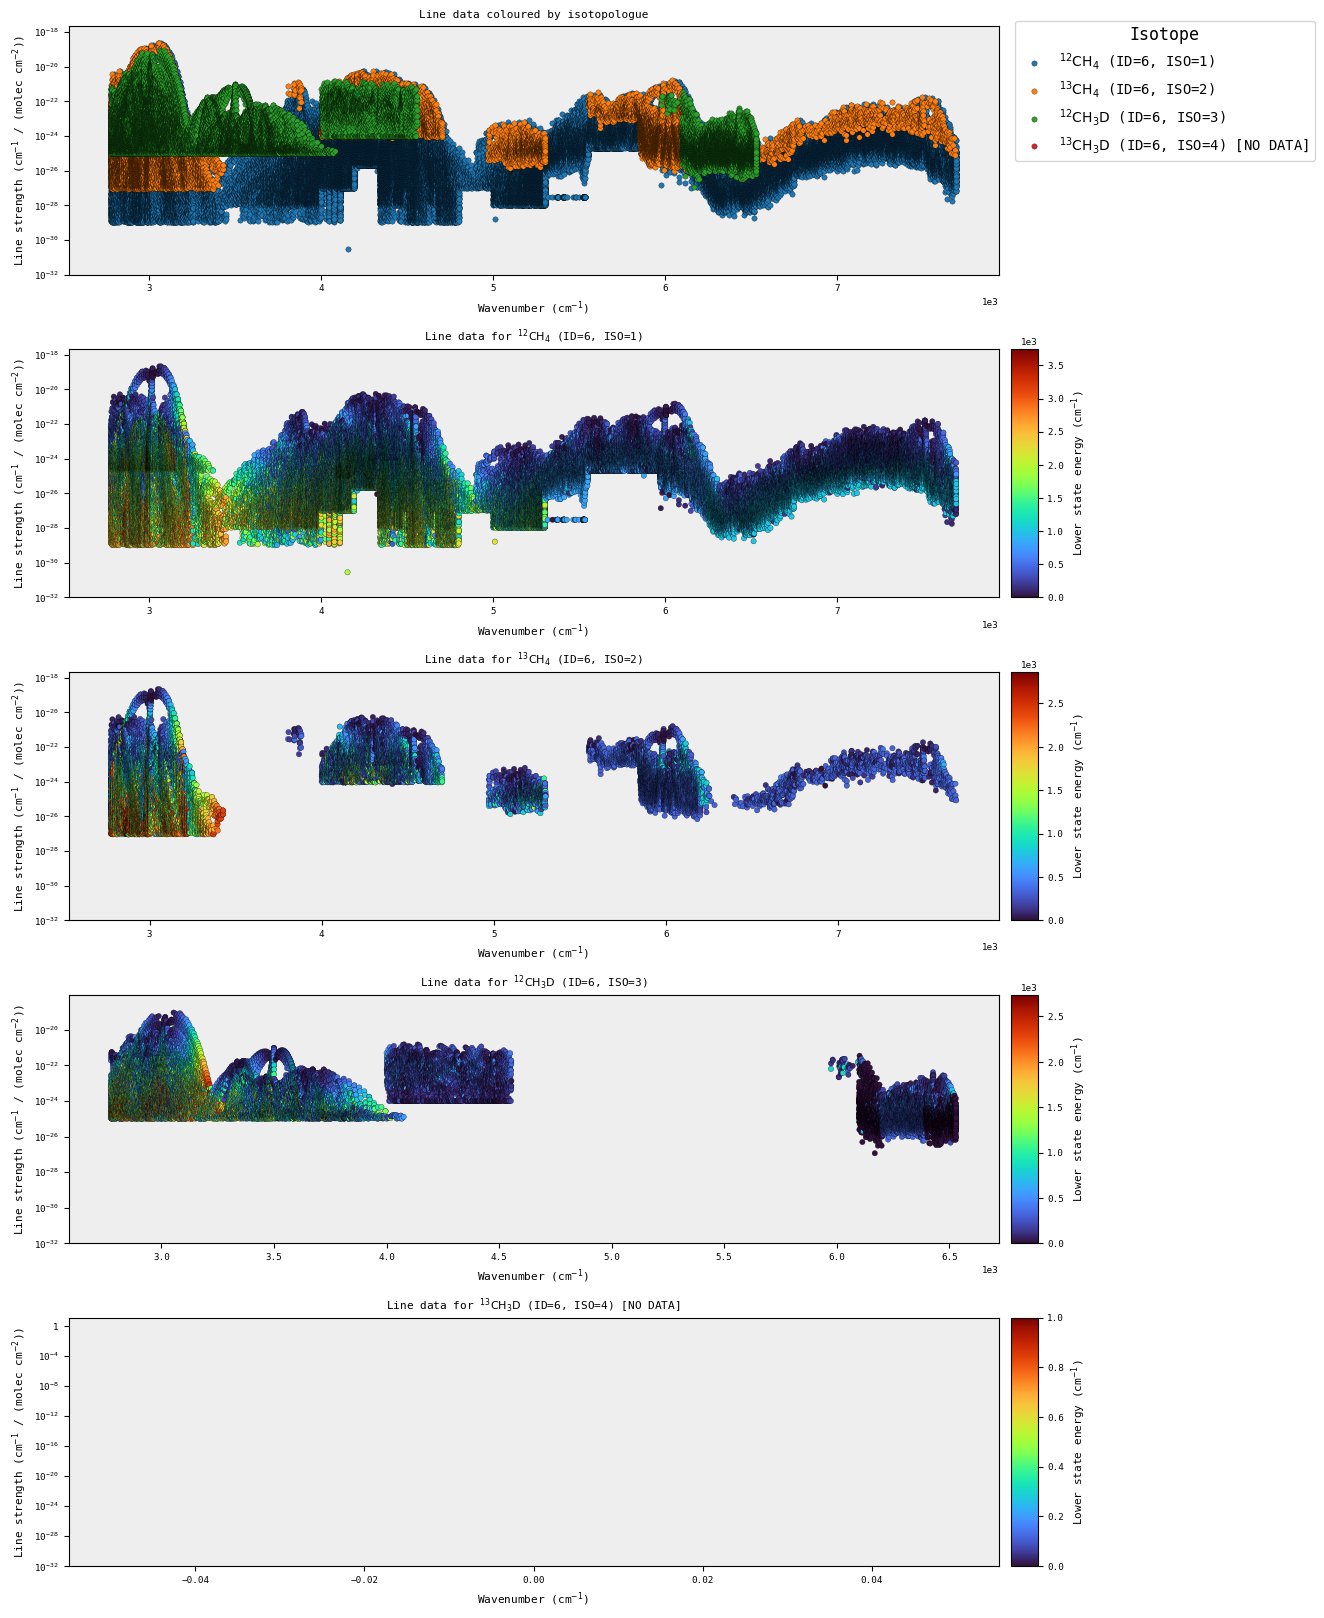

In [6]:
# Create example plot #

line_data.plot_linedata()